In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv("homeprices_banglore.csv")

In [4]:
df.sample(5)

,area,bedrooms,price
13,1100,2,40.00
11,2785,4,140.00
2,1440,3,62.00
0,1056,2,39.07
1,2600,4,120.00


In [5]:
from sklearn import preprocessing 
sx = preprocessing.MinMaxScaler()
sy = preprocessing.MinMaxScaler()

scaled_x = sx.fit_transform(df.drop('price',axis='columns'))
scaled_x

array([[0.08827586, 0.25      ],
       [0.62068966, 0.75      ],
       [0.22068966, 0.5       ],
       [0.24862069, 0.5       ],
       [0.13793103, 0.25      ],
       [0.12758621, 0.25      ],
       [0.6662069 , 0.75      ],
       [0.86206897, 0.75      ],
       [0.17586207, 0.5       ],
       [1.        , 1.        ],
       [0.34482759, 0.5       ],
       [0.68448276, 0.75      ],
       [0.06896552, 0.25      ],
       [0.10344828, 0.25      ],
       [0.5       , 0.5       ],
       [0.12931034, 0.25      ],
       [0.13103448, 0.5       ],
       [0.25517241, 0.5       ],
       [0.67931034, 0.5       ],
       [0.        , 0.        ]])

In [6]:
scaled_y = sy.fit_transform(df['price'].values.reshape(df.shape[0],1))
scaled_y

array([[0.05237037],
       [0.65185185],
       [0.22222222],
       [0.31851852],
       [0.14074074],
       [0.04444444],
       [0.76296296],
       [0.91111111],
       [0.13333333],
       [1.        ],
       [0.37037037],
       [0.8       ],
       [0.04444444],
       [0.05925926],
       [0.51111111],
       [0.07407407],
       [0.11851852],
       [0.20740741],
       [0.51851852],
       [0.        ]])

In [10]:
np.ones(shape=(2))

array([1., 1.])

In [11]:
scaled_x.T

array([[0.08827586, 0.62068966, 0.22068966, 0.24862069, 0.13793103,
        0.12758621, 0.6662069 , 0.86206897, 0.17586207, 1.        ,
        0.34482759, 0.68448276, 0.06896552, 0.10344828, 0.5       ,
        0.12931034, 0.13103448, 0.25517241, 0.67931034, 0.        ],
       [0.25      , 0.75      , 0.5       , 0.5       , 0.25      ,
        0.25      , 0.75      , 0.75      , 0.5       , 1.        ,
        0.5       , 0.75      , 0.25      , 0.25      , 0.5       ,
        0.25      , 0.5       , 0.5       , 0.5       , 0.        ]])

## Batch Gradient Descent


In [12]:
def batch_gradient_descent(x, y_true, epochs, learning_rate = 0.01):
    
    number_of_features = x.shape[1]
    
    w = np.ones(shape=(number_of_features))
    b = 0
    total_samples = x.shape[0]
    
    cost_list = []
    epoch_list = []
    
    for i in range(epochs):
        y_predicted = np.dot(w, scaled_x.T) + b  # w1*area+w2*bedrooms+bias
        w_grad = -(2/total_samples)*(x.T.dot(y_true - y_predicted))
        b_grad = -(2/total_samples)*np.sum(y_true - y_predicted)
        
        w = w - learning_rate * w_grad
        b = b - learning_rate * b_grad
        
        cost = np.mean(np.square(y_true - y_predicted))
        
        if i%10==0:
            cost_list.append(cost)
            epoch_list.append(i)
            
    return w, b, cost, cost_list, epoch_list

w, b, cost, cost_list, epoch_list = batch_gradient_descent(scaled_x, scaled_y.reshape(scaled_y.shape[0],),500)
            
        

In [47]:
w, b, cost

(array([0.70712464, 0.67456527]), -0.23034857438407427, 0.0068641890429808105)

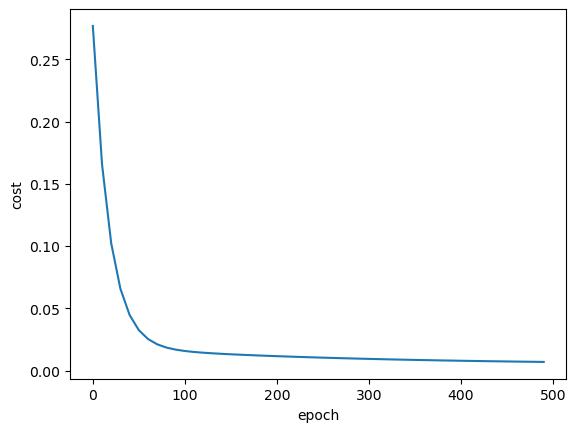

In [15]:
plt.xlabel('epoch')
plt.ylabel('cost')
plt.plot(epoch_list, cost_list)

In [16]:
## scaled the values into 0 to 1
sx.transform([[2600,4]])

C:\Users\hp\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array([[0.62068966, 0.75      ]])

In [17]:
w

array([0.70712464, 0.67456527])

In [20]:
# rescaled the values it means convert it into original values
sy.inverse_transform([[1,0,0.5]])

array([[167. ,  32. ,  99.5]])

In [25]:
#  predict values using this w and b----

def predict(area, bedrooms,w,b):
    
    scaled_x = sx.transform([[area,bedrooms]])[0]
    scaled_price = w[0]*scaled_x[0] + w[1]*scaled_x[1] + b
    
    return sy.inverse_transform([[scaled_price]])[0][0]
    


predict(2600,4,w,b)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


128.45484403267596

In [26]:
predict(1000,2,w,b)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


30.253094462442355

## Stochastic Gradient Descent

In [32]:
import random
random.randint(0,6)

6

In [68]:
def stochastic_gradient_descent(x, y_true, epochs, learning_rate = 0.01):
    
    number_of_features = x.shape[1]
    
    w = np.ones(shape=(number_of_features))
    b = 0
    total_samples = x.shape[0]
    
    cost_list = []
    epoch_list = []
    
    for i in range(epochs):
        
        random_index = random.randint(0, total_samples-1)
        
        sample_x = x[random_index]
        sample_y = y_true[random_index]
        y_predicted = np.dot(w, sample_x.T) + b
        
        w_grad = -(2/total_samples)*(sample_x.T.dot(sample_y - y_predicted))
        b_grad = -(2/total_samples)*(sample_y - y_predicted)
        
        w = w - learning_rate * w_grad
        b = b - learning_rate * b_grad
        
        cost = np.square(sample_y - y_predicted)
        
        if i%100==0:
            cost_list.append(cost)
            epoch_list.append(i)
            
    return w, b, cost, cost_list, epoch_list


w_sgd, b_sgd, cost_sgd, cost_list_sgd, epoch_list_sgd = stochastic_gradient_descent(scaled_x, scaled_y.reshape(scaled_y.shape[0],),10000)
w_sgd, b_sgd, cost_sgd

(array([0.71034366, 0.67456695]), -0.2300030039810808, 0.0019033709594642)

In [66]:
w,b,cost

(array([0.70712464, 0.67456527]), -0.23034857438407427, 0.0068641890429808105)

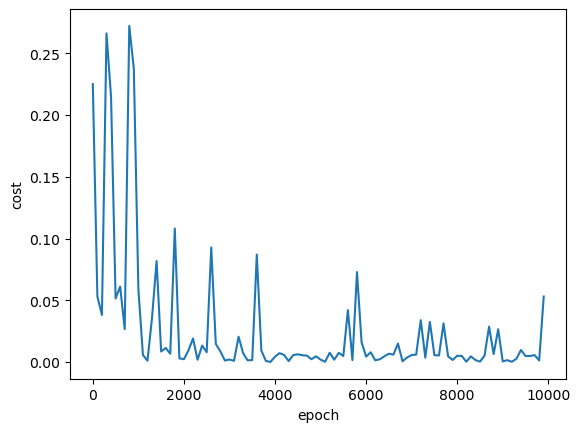

In [69]:
plt.xlabel('epoch')
plt.ylabel('cost')
plt.plot(epoch_list_sgd, cost_list_sgd)

In [70]:
predict(2600,4,w_sgd,b_sgd)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


128.77139835938308

## Mini Batch Gradient Descent


In [77]:
def mini_batch_gradient_descent(x, y_true, epochs = 100, batch_size = 5, learning_rate = 0.01):
    
    number_of_features = x.shape[1]
    
    w = np.ones(shape=(number_of_features))
    b = 0
    total_samples = x.shape[0]
    
    if batch_size > total_samples:  # in this case mini batch becomes same as batch gradient 
        batch_size = total_samples
        
        
        
    cost_list = []
    epoch_list = []
    
    num_batches = int(total_samples/batch_size)
    
    for i in range(epochs):
        
        random_indices = np.random.permutation(total_samples)
        x_temp = x[random_indices]
        y_temp = y_true[random_indices]
        
        for j in range(0,total_samples,batch_size):
            
        
            xj = x_temp[j:j+batch_size]
            yj = y_temp[j:j+batch_size]
            
            
            y_predicted = np.dot(w, xj.T) + b

            w_grad = -(2/len(xj))*(xj.T.dot(yj - y_predicted))
            b_grad = -(2/len(xj))*np.sum(yj - y_predicted)

            w = w - learning_rate * w_grad
            b = b - learning_rate * b_grad

            cost = np.mean(np.square(yj - y_predicted))
        
        if i%10==0:
            cost_list.append(cost)
            epoch_list.append(i)
            
    return w, b, cost, cost_list, epoch_list


w_mgd, b_mgd, cost_mgd, cost_list_mgd, epoch_list_mgd = mini_batch_gradient_descent(scaled_x, scaled_y.reshape(scaled_y.shape[0],),epochs=120,batch_size = 5)

w_mgd, b_mgd, cost_mgd

(array([0.71008621, 0.67826944]), -0.23329484141058737, 0.0022500369934149783)

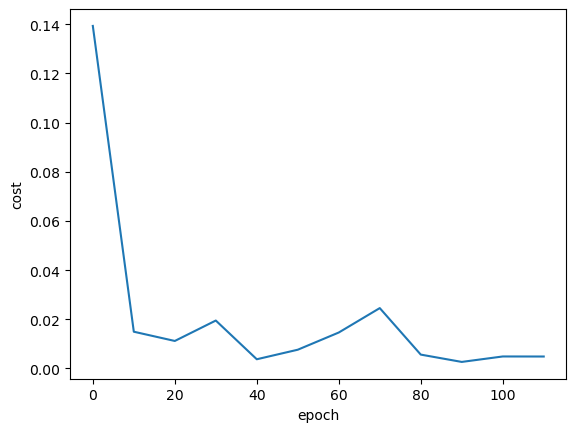

In [78]:
plt.xlabel('epoch')
plt.ylabel('cost')
plt.plot(epoch_list_mgd, cost_list_mgd)

In [79]:
predict(2600,4,w_mgd,b_mgd)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


128.68030373129463